*Sebastian Raschka*  
last modified: 04/03/2014

<hr>
I am really looking forward to your comments and suggestions to improve and extend this tutorial! Just send me a quick note   
via Twitter: [@rasbt](https://twitter.com/rasbt)  
or Email: [bluewoodtree@gmail.com](mailto:bluewoodtree@gmail.com)
<hr>

### Problem Category
- Statistical Pattern Recognition   
- Supervised Learning  
- Parametric Learning  
- Bayes Decision Theory  
- Multivariate data (2-dimensional)
- 2-class problem
- equal variances
- equal prior probabilities
- Gaussian model (2 parameters)
- no conditional Risk (1-0 loss functions)
<hr>

<p><a name="sections"></a>
<br></p>



# Sections


<p>&#8226; <a href="#given">Given information</a><br>
&#8226; <a href="#deriving_db">Deriving the decision boundary</a><br>
&#8226; <a href="#classify_rand">Classifying some random example data</a><br>
&#8226; <a href="#chern_err">Calculating the Chernoff theoretical bounds for P(error)</a><br>
&#8226; <a href="#emp_err">Calculating the empirical error rate</a><br>

  

  
  



<hr>

<p><a name="given"></a>
<br></p>


## Given information:


[<a href="#sections">back to top</a>] <br>

<br> 




####model: continuous univariate normal (Gaussian) model for the class-conditional densities


$p(\vec{x} | \omega_j) \sim N(\vec{\mu}|\Sigma)$ 

$p(\vec{x} | \omega_j) \sim \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp{ \bigg[-\frac{1}{2} (\vec{x}-\vec{\mu})^t \Sigma^{-1}(\vec{x}-\vec{\mu}) \bigg] }$




####Prior probabilities:

$P(\omega_1) = P(\omega_2) = 0.5$


 

The samples are of 2-dimensional feature vectors:

$\vec{x} = \bigg[ 
\begin{array}{c}
x_1 \\
x_2 \\
\end{array} \bigg]$

#### Means of the sample distributions for 2-dimensional features:

$\vec{\mu}_{\,1} = \bigg[ 
\begin{array}{c}
0 \\
0 \\
\end{array} \bigg]$,
$\; \vec{\mu}_{\,2} = \bigg[ 
\begin{array}{c}
1 \\
1 \\
\end{array} \bigg]$

#### Covariance matrices for the statistically independend and identically distributed ('i.i.d') features: 

$\Sigma_i = \bigg[ 
\begin{array}{cc}
\sigma_{11}^2 & \sigma_{12}^2\\
\sigma_{21}^2 & \sigma_{22}^2 \\
\end{array} \bigg], \; 
\Sigma_1 = \Sigma_2 = I = \bigg[ 
\begin{array}{cc}
1 & 0\\
0 & 1 \\
\end{array} \bigg], \;$

####Class conditional probabilities:

$p(\vec{x}\;|\;\omega_1) \sim N \bigg( \vec{\mu_1} = \;  \bigg[ 
\begin{array}{c}
0 \\
0 \\
\end{array} \bigg], \Sigma = I \bigg)$

$p(\vec{x}\;|\;\omega_2) \sim N \bigg( \vec{\mu_2} = \;  \bigg[ 
\begin{array}{c}
1 \\
1 \\
\end{array} \bigg], \Sigma = I \bigg)$

<p><a name="deriving_db"></a>
<br></p>


## Deriving the decision boundary

[<a href="#sections">back to top</a>] <br>


### Bayes' Rule:


$P(\omega_j|x) = \frac{p(x|\omega_j) * P(\omega_j)}{p(x)}$ 


### Discriminant Functions:

The goal is to maximize the discriminant function, which we define as the posterior probability here to perform a **minimum-error classification** (Bayes classifier).

$g_1(\vec{x}) = P(\omega_1 | \; \vec{x}), \quad  g_2(\vec{x}) = P(\omega_2 | \; \vec{x})$

$\Rightarrow g_1(\vec{x}) = P(\vec{x}|\;\omega_1) \;\cdot\; P(\omega_1) \quad | \; ln \\
\quad g_2(\vec{x}) = P(\vec{x}|\;\omega_2) \;\cdot\; P(\omega_2) \quad | \; ln$

<br>
We can drop the prior probabilities (since we have equal priors in this case): 

$\Rightarrow g_1(\vec{x}) = ln(P(\vec{x}|\;\omega_1))\\
\quad g_2(\vec{x}) = ln(P(\vec{x}|\;\omega_2))$

$\Rightarrow g_1(\vec{x}) = \frac{1}{2\sigma^2} \bigg[\; \vec{x}^{\,t} - 2 \vec{\mu_1}^{\,t} \vec{x} + \vec{\mu_1}^{\,t} \bigg] \mu_1 \\ 
= - \frac{1}{2} \bigg[ \vec{x}^{\,t} \vec{x} -2 \; [0 \;\; 0] \;\; \vec{x} +  [0 \;\; 0] \;\; \bigg[ 
\begin{array}{c}
0 \\
0 \\
\end{array} \bigg] \bigg] \\
= -\frac{1}{2} \vec{x}^{\,t} \vec{x}$

$\Rightarrow g_2(\vec{x}) = \frac{1}{2\sigma^2} \bigg[\; \vec{x}^{\,t} - 2 \vec{\mu_2}^{\,t} \vec{x} + \vec{\mu_2}^{\,t} \bigg] \mu_2 \\ 
= - \frac{1}{2} \bigg[ \vec{x}^{\,t} \vec{x} -2 \; 2\;  [1 \;\; 1] \;\; \vec{x} +  [1 \;\; 1] \;\; \bigg[ 
\begin{array}{c}
1 \\
1 \\
\end{array} \bigg] \bigg] \\
= -\frac{1}{2} \; \bigg[ \; \vec{x}^{\,t} \vec{x} - 2\;  [1 \;\; 1] \;\; \vec{x} + 2\; \bigg] \;$

### Decision Boundary

$g_1(\vec{x}) = g_2(\vec{x})$ 

$\Rightarrow  -\frac{1}{2} \vec{x}^{\,t} \vec{x} = -\frac{1}{2} \; \bigg[ \; \vec{x}^{\,t} \vec{x} - 2\;  [1 \;\; 1] \;\; \vec{x} + 2\; \bigg] \;$ 

$\Rightarrow -2[1\;\; 1] \vec{x} + 2 = 0$

$\Rightarrow [-2\;\; -2] \;\;\vec{x} + 2 = 0$

$\Rightarrow -2x_1 - 2x_2 + 2 = 0$

$\Rightarrow -x_1 - x_2 + 1 = 0$

<p><a name="classify_rand"></a>
<br></p>



## Classifying some random example data



[<a href="#sections">back to top</a>] <br>

Populating the interactive namespace from numpy and matplotlib


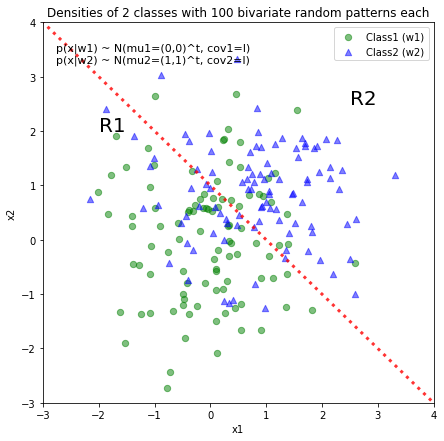

In [1]:
%pylab inline

import numpy as np
from matplotlib import pyplot as plt

def decision_boundary(x_1):
    """ Calculates the x_2 value for plotting the decision boundary."""
    return -x_1 + 1

# Generate 100 random patterns for class1
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[1,0],[0,1]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

# Generate 100 random patterns for class2
mu_vec2 = np.array([1,1])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T # to 1-col vector

# Scatter plot
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x1_samples[:,0], x1_samples[:,1], marker='o', color='green', s=40, alpha=0.5)
ax.scatter(x2_samples[:,0], x2_samples[:,1], marker='^', color='blue', s=40, alpha=0.5)
plt.legend(['Class1 (w1)', 'Class2 (w2)'], loc='upper right') 
plt.title('Densities of 2 classes with 100 bivariate random patterns each')
plt.ylabel('x2')
plt.xlabel('x1')
ftext = 'p(x|w1) ~ N(mu1=(0,0)^t, cov1=I)\np(x|w2) ~ N(mu2=(1,1)^t, cov2=I)'
plt.figtext(.15,.8, ftext, fontsize=11, ha='left')
plt.ylim([-3,4])
plt.xlim([-3,4])



# Plot decision boundary
x_1 = np.arange(-5, 5, 0.1)
bound = decision_boundary(x_1)
plt.annotate('R1', xy=(-2, 2), xytext=(-2, 2), size=20)
plt.annotate('R2', xy=(2.5, 2.5), xytext=(2.5, 2.5), size=20)
plt.plot(x_1, bound, color='r', alpha=0.8, linestyle=':', linewidth=3)

x_vec = np.linspace(*ax.get_xlim())
x_1 = np.arange(0, 100, 0.05)

plt.show()

<p><a name="chern_err"></a>
<br></p>



## Calculating the Chernoff theoretical bounds for P(error)



[<a href="#sections">back to top</a>] <br>

$P(error) \le p^{\beta}(\omega_1) \; p^{1-\beta}(\omega_2) \; e^{-(\beta(1-\beta))}$

$\Rightarrow 0.5^\beta \cdot 0.5^{(1-\beta)} \; e^{-(\beta(1-\beta))}$

$\Rightarrow 0.5 \cdot e^{-\beta(1-\beta)}$

$min[P(\omega_1), \; P(\omega_2)] \le 0.5 \; e^{-(\beta(1-\beta))} \quad for \; P(\omega_1), \; P(\omega_2) \ge \; 0 \; and \; 0 \; \le \; \beta \; \le 1$

### Plotting the Chernoff Bound for $0 \le \beta \le 1$

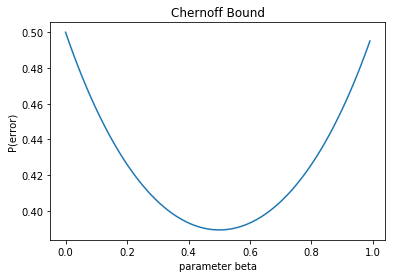

In [2]:
def chernoff_bound(beta):
    return 0.5 * np.exp(-beta * (1-beta))

betas = np.arange(0, 1, 0.01)
c_bound = chernoff_bound(betas)

plt.plot(betas, c_bound)
plt.title('Chernoff Bound')
plt.ylabel('P(error)')
plt.xlabel('parameter beta')

plt.show()

#### Finding the global minimum: 

In [3]:
from scipy.optimize import minimize

x0 = [0.39] # initial guess (here: guessed based on the plot)
res = minimize(chernoff_bound, x0, method='Nelder-Mead')
print(res)

 final_simplex: (array([[ 0.49999219],
       [ 0.50006836]]), array([ 0.38940039,  0.38940039]))
           fun: 0.38940039155946954
       message: 'Optimization terminated successfully.'
          nfev: 24
           nit: 12
        status: 0
       success: True
             x: array([ 0.49999219])


<p><a name="emp_err"></a>
<br></p>



## Calculating the empirical error rate



[<a href="#sections">back to top</a>] <br>

In [4]:
def decision_rule(x_vec):
    """ Returns value for the decision rule of 2-d row vectors """
    x_1 = x_vec[0]
    x_2 = x_vec[1]
    return -x_1 - x_2 + 1

w1_as_w2, w2_as_w1 = 0, 0

for x in x1_samples:
    if decision_rule(x) < 0:
        w1_as_w2 += 1
for x in x2_samples:
    if decision_rule(x) > 0:
        w2_as_w1 += 1

emp_err = (w1_as_w2 + w2_as_w1) / float(len(x1_samples) + len(x2_samples))
    
print('Empirical Error: {}%'.format(emp_err * 100))

Empirical Error: 26.0%


In [ ]:
test complete; Gopal